# Matplotlib

## What is Matplotlib and why use it?

Matplotlib is a comprehensive plotting library that provides:
- Publication-quality figures
- Fine-grained control over plot elements
- Multiple output formats (PNG, PDF, SVG, etc.)
- Object-oriented and state-based interfaces
- Extensive customization options
- Integration with NumPy and Pandas

Key advantages:
- Industry standard for Python plotting
- Highly customizable
- Large community and documentation
- Backend flexibility
- Export to multiple formats

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
categories = ['A', 'B', 'C', 'D']
values = [4, 3, 2, 1]

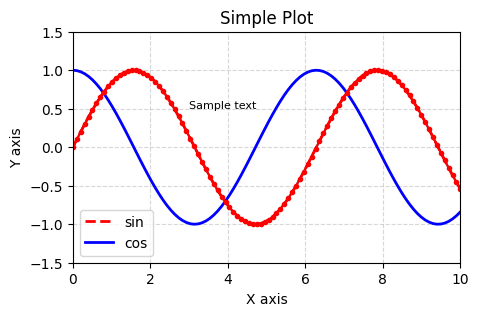

In [2]:
# Basic plot, more customization
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x, np.sin(x))

ax.set_xlabel('X axis') # labels and title
ax.set_ylabel('Y axis')
ax.set_title('Simple Plot')

ax.plot(x, np.sin(x), 'r--', linewidth=2, label='sin') # line styles and colors
ax.plot(x, np.cos(x), 'b-', linewidth=2, label='cos')
ax.plot(x, np.sin(x), 'ro-', markersize=3) # markers
ax.grid(True, linestyle='--', alpha=0.5) # grid

ax.legend(loc='best') # legend

ax.set_xlim([0, 10]) # axis limits
ax.set_ylim([-1.5, 1.5])

ax.text(3, 0.5, 'Sample text', fontsize=8) # text annotation

ax.set_xticks([0, 2, 4, 6, 8, 10]) # custom tick labels
ax.set_xticklabels(['0', '2', '4', '6', '8', '10'])
plt.show()

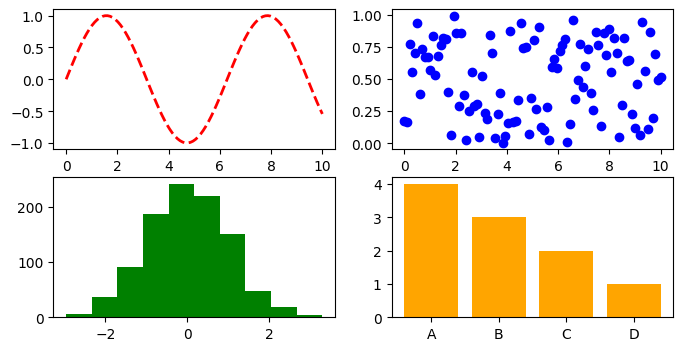

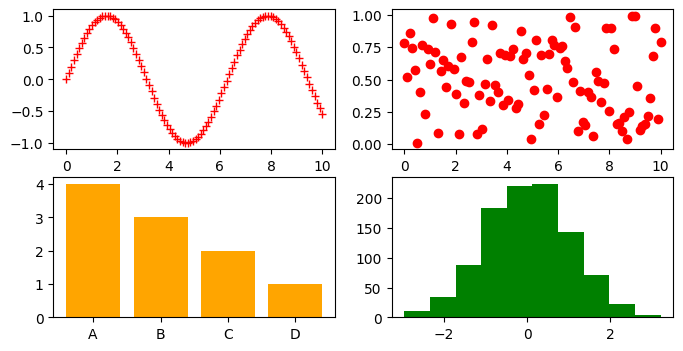

In [3]:
# Method 1: subplot grid
fig, axes = plt.subplots(2, 2, figsize=(8, 4))
axes[0, 0].plot(x, np.sin(x), 'r--', linewidth=2, label='sin')
axes[0, 1].scatter(x, np.random.rand(100), color='blue')
axes[1, 0].hist(np.random.randn(1000), color='green')
axes[1, 1].bar(categories, values, color='orange')

# Method 2: subplot positions
plt.figure(figsize=(8, 4))
plt.subplot(221)  # 2 rows, 2 cols, position 1
plt.plot(x, np.sin(x), 'r+', linewidth=2, label='sin')
plt.subplot(222)
plt.scatter(x, np.random.rand(100), color='red')
plt.subplot(223)
plt.bar(categories, values, color='orange')
plt.subplot(224)
plt.hist(np.random.randn(1000), color='green')

plt.show()

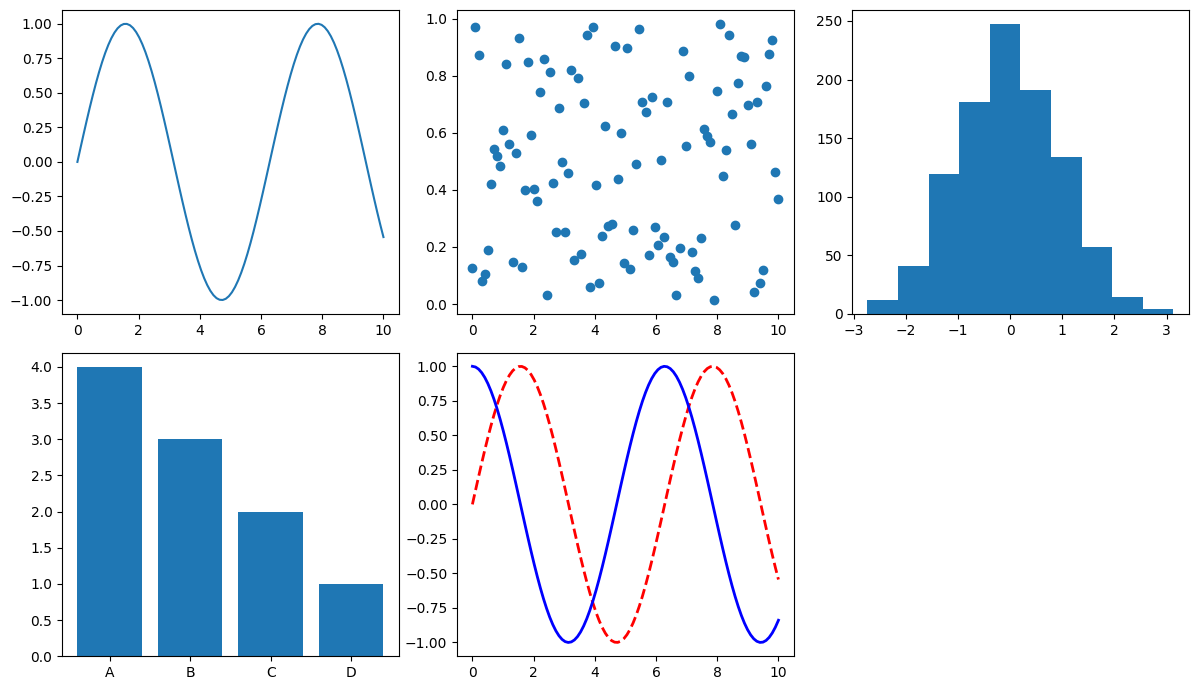

In [4]:
fig, axs = plt.subplots(2, 3, figsize=(12, 7))
axs = axs.flatten()

axs[0].plot(x, np.sin(x))
axs[1].scatter(x, np.random.rand(100))
axs[2].hist(np.random.randn(1000))
axs[3].bar(categories, values)
axs[4].plot(x, np.sin(x), 'r--', linewidth=2, label='sin')
axs[4].plot(x, np.cos(x), 'b-', linewidth=2, label='cos')
axs[5].set_visible(False)

plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()

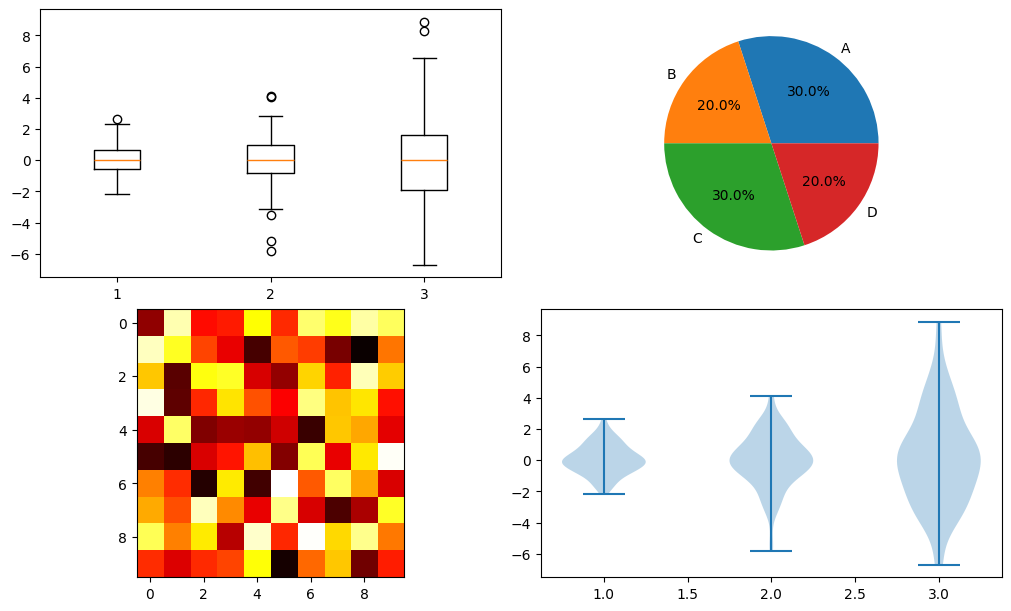

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6), layout="constrained") # constrained layout is preferred to tight_layout
axs = axs.flatten() 

data = [np.random.normal(0, std, 100) for std in range(1, 4)]
axs[0].boxplot(data)
axs[3].violinplot(data)

sizes = [30, 20, 30, 20]
labels = ['A', 'B', 'C', 'D']
axs[1].pie(sizes, labels=labels, autopct='%1.1f%%')

data = np.random.rand(10, 10)
axs[2].imshow(data, cmap='hot')
plt.show()

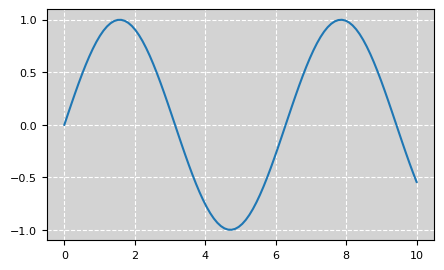

In [6]:
# Custom style dictionary
custom_style = {
    'axes.facecolor': 'lightgray',
    'axes.grid': True,
    'grid.color': 'white',
    'grid.linestyle': '--',
    'font.size': 8,
}

# Apply custom style
with plt.style.context(custom_style):
    plt.figure(figsize=(5, 3))
    plt.plot(x, np.sin(x))

# Multiple styles
plt.style.use('dark_background')

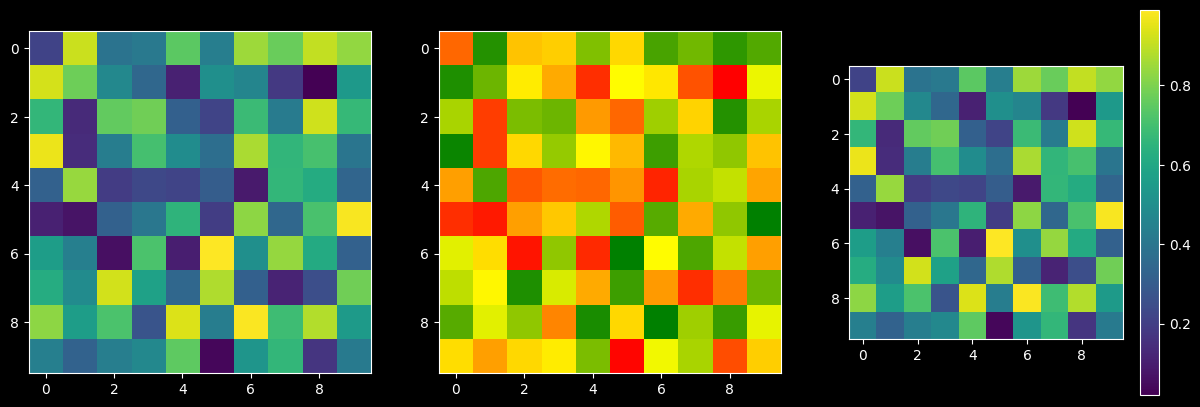

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(data, cmap='viridis')

# Custom colormap
from matplotlib.colors import LinearSegmentedColormap
colors = ['red', 'yellow', 'green']
n_bins = 100
cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

# Apply custom colormap
ax[1].imshow(data, cmap=cmap)

# Normalize colormap
from matplotlib.colors import Normalize
norm = Normalize(vmin=data.min(), vmax=data.max())
ax[2].imshow(data, cmap='viridis', norm=norm)
plt.colorbar(ax[2].images[0], ax=ax[2])

plt.show();

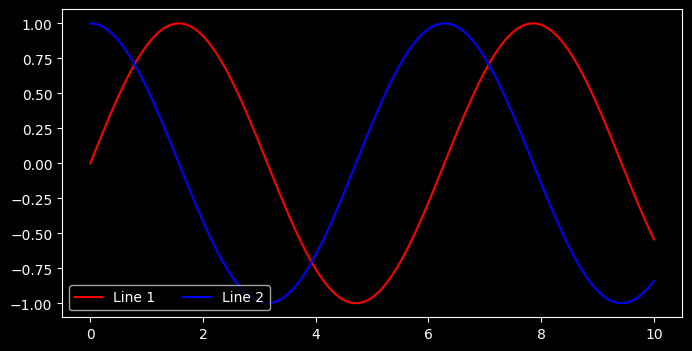

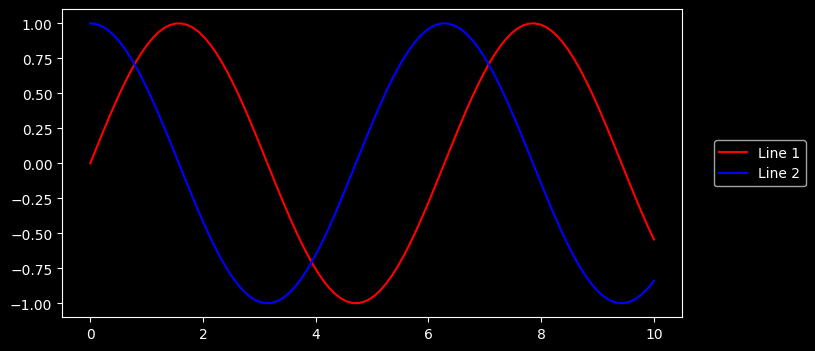

In [8]:
# Create some example data to plot
x = np.linspace(0, 10, 100)
plt.figure(figsize=(8, 4))
plt.plot(x, np.sin(x), color='red', label='Line 1')
plt.plot(x, np.cos(x), color='blue', label='Line 2')
plt.legend(ncol=2)

# Create a second figure to show different legend placements
plt.figure(figsize=(8, 4))
plt.plot(x, np.sin(x), color='red', label='Line 1')
plt.plot(x, np.cos(x), color='blue', label='Line 2')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc='center left');

In [9]:
plt.style.use('default')

# Seaborn

## What is Seaborn and why use it?

Seaborn is a statistical visualization library that provides:
- High-level interface for statistical graphics
- Beautiful default styles
- Built-in themes
- Integration with Pandas DataFrames
- Statistical estimation and visualization
- Complex plot types with simple commands

Key advantages:
- Built on top of Matplotlib
- Attractive default aesthetics
- Statistical plotting functions
- Automatic handling of Pandas data
- Built-in themes and color palettes

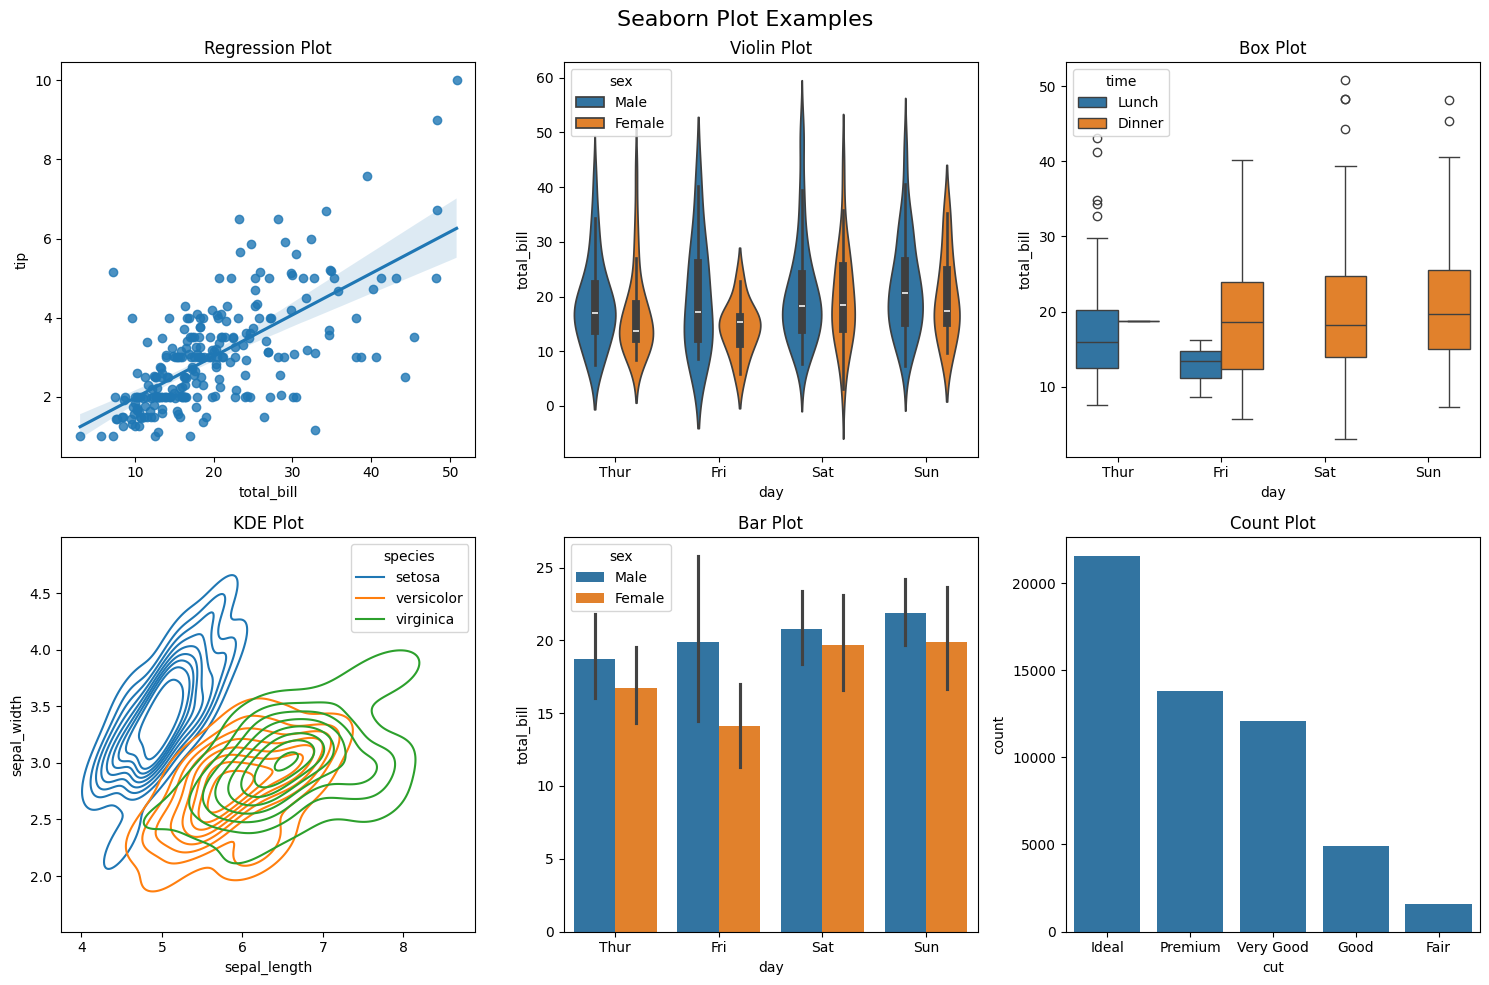

In [10]:
import seaborn as sns
import pandas as pd
import numpy as np

# Load example datasets
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris") 
diamonds = sns.load_dataset("diamonds")

# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Seaborn Plot Examples', size=16)

# Scatter plot with regression line
sns.regplot(data=tips, x="total_bill", y="tip", ax=axes[0,0])
axes[0,0].set_title('Regression Plot')

# Violin plot
sns.violinplot(data=tips, x="day", y="total_bill", hue="sex", ax=axes[0,1])
axes[0,1].set_title('Violin Plot')

# Box plot
sns.boxplot(data=tips, x="day", y="total_bill", hue="time", ax=axes[0,2])
axes[0,2].set_title('Box Plot')

# KDE plot
sns.kdeplot(data=iris, x="sepal_length", y="sepal_width", hue="species", ax=axes[1,0])
axes[1,0].set_title('KDE Plot')

# Bar plot
sns.barplot(data=tips, x="day", y="total_bill", hue="sex", ax=axes[1,1])
axes[1,1].set_title('Bar Plot')

# Count plot
sns.countplot(data=diamonds, x="cut", ax=axes[1,2])
axes[1,2].set_title('Count Plot')

plt.tight_layout()
plt.show()

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

penguins = sns.load_dataset("penguins")
sns.regplot(data=penguins, x="flipper_length_mm", y="body_mass_g", ax=axes[0,0]) # regression plot
axes[0,0].set_title('Regression Plot')

sns.residplot(data=penguins, x="flipper_length_mm", y="body_mass_g", ax=axes[0,1]) # residual plot
axes[0,1].set_title('Residual Plot')

flights = sns.load_dataset("flights")
flights_pivot = flights.pivot(index="month", columns="year", values="passengers")
sns.heatmap(flights_pivot, center=flights_pivot.mean().mean(), ax=axes[1,0]) # heatmap
axes[1,0].set_title('Heatmap')

dots = sns.load_dataset("dots")
sns.lineplot(data=dots, x="time", y="firing_rate", hue="coherence", ax=axes[1,1]) # line plot
axes[1,1].set_title('Line Plot')

plt.tight_layout()
plt.show()

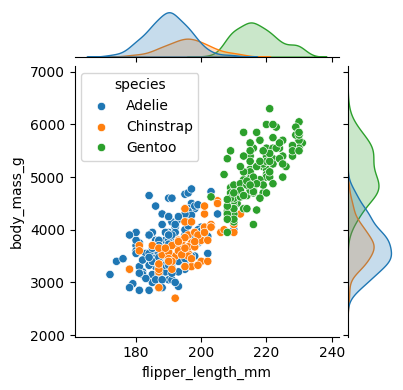

In [12]:
# Figure-level plots (these create their own figures)
sns.jointplot(data=penguins, x="flipper_length_mm", y="body_mass_g", hue="species", height=4) # joint distribution plot with custom figure size

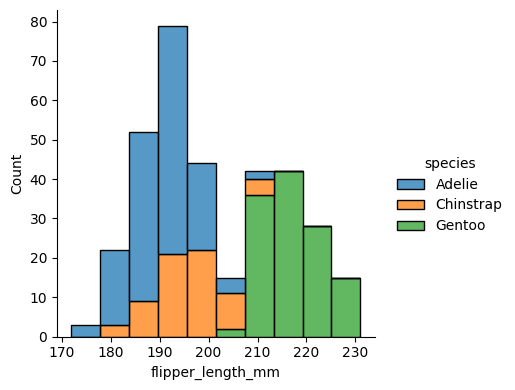

In [13]:
# Distribution plot
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", height=4)

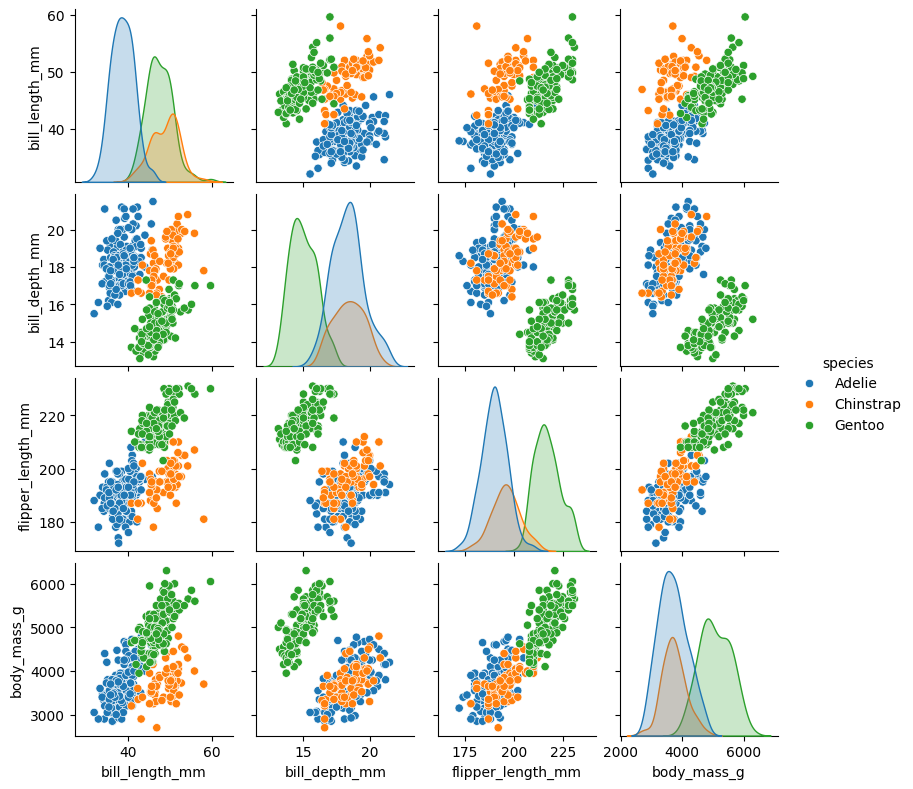

In [14]:
# Pair plot
sns.pairplot(data=penguins, hue="species", height=2)

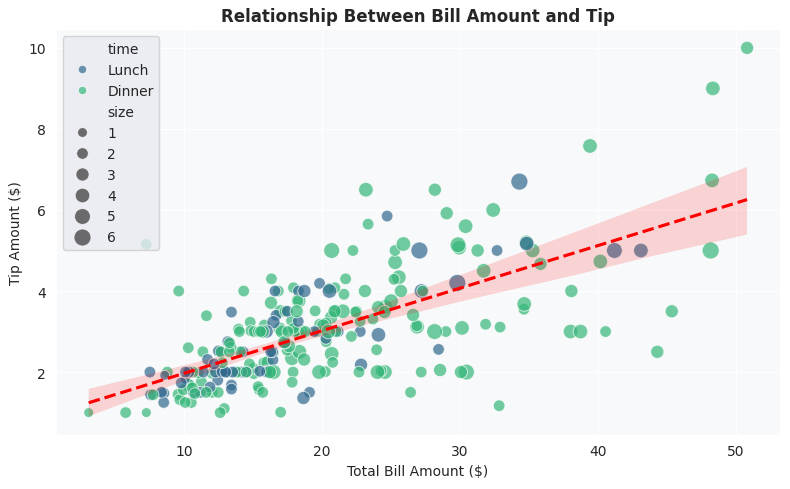

In [15]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(8, 5))
    
    g = sns.scatterplot(data=tips, x='total_bill', y='tip',  hue='time', size='size',
                       sizes=(50, 150), alpha=0.7,
                       palette='viridis')
    sns.regplot(data=tips, x='total_bill', y='tip',
                scatter=False, color='red', line_kws={'linestyle':'--'}) # add trend line 
    # Style the plot
    g.set_title('Relationship Between Bill Amount and Tip', fontweight='bold')
    g.set_xlabel('Total Bill Amount ($)')
    g.set_ylabel('Tip Amount ($)')
    
    g.set_facecolor('#f8f9fa')
    plt.tight_layout()

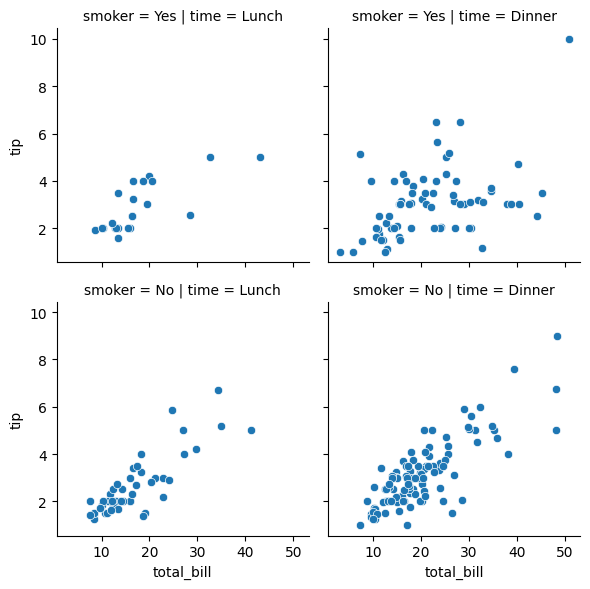

In [16]:
g = sns.FacetGrid(tips, col='time', row='smoker')
g.map(sns.scatterplot, 'total_bill', 'tip'); plt.tight_layout()

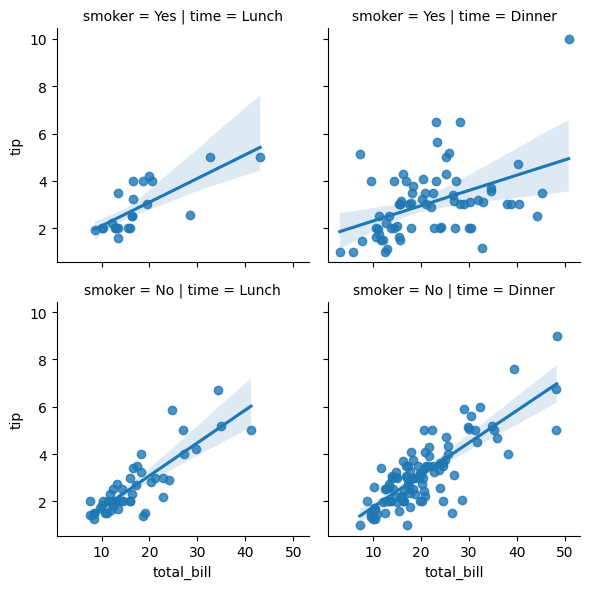

In [17]:
sns.lmplot(data=tips, x='total_bill', y='tip', col='time', row='smoker', height=3) # lmplot

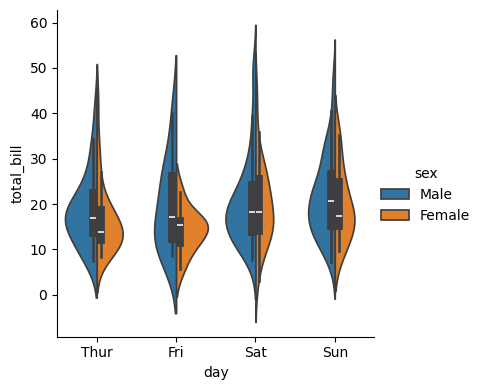

In [18]:
sns.catplot(data=tips, x='day', y='total_bill', kind='violin', hue='sex', split=True, height=4) # catplot

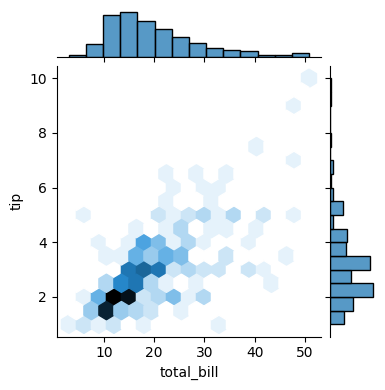

In [19]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex', height=4) # jointplot

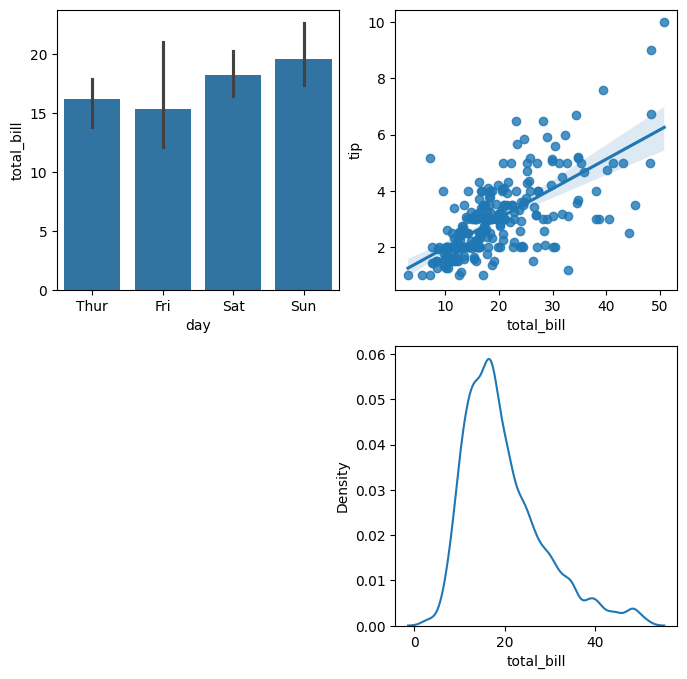

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
sns.barplot(data=tips, x='day', y='total_bill', estimator=np.median, ax=axs[0,0]) # estimator np.median
sns.regplot(data=tips, x='total_bill', y='tip', ci=95, ax=axs[0,1]) # confidence interval
sns.kdeplot(data=tips['total_bill'], bw_adjust=0.5, ax=axs[1,1]) # kernel density estimate
axs[1,0].set_visible(False)
plt.show()

# Plotly

## What is Plotly and why use it?

Plotly is a modern interactive plotting library that provides:
- Interactive plots with zoom, pan, hover tooltips
- Web-based visualizations
- Both Python and JavaScript APIs
- Export to HTML and various image formats
- Support for scientific, financial, and geographic plotting

Key advantages:
- Interactive by default
- Publication-quality graphics
- Web-ready visualizations
- Extensive chart types
- Easy sharing and collaboration

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [2]:
# Load example datasets
df = px.data.iris()
tips = px.data.tips()
gapminder = px.data.gapminder()

# Create an elegant scatter plot
fig = px.scatter(
    df, 
    x="sepal_width", 
    y="sepal_length",
    color="species",
    size="petal_length",
    title="Iris Flower Dimensions",
    labels={
        "sepal_width": "Sepal Width (cm)",
        "sepal_length": "Sepal Length (cm)",
        "species": "Species"
    },
    template="plotly_white",
    opacity=0.8,
    hover_data=["petal_width", "petal_length"]
)

# Customize the layout
fig.update_layout(
    title_x=0.5,
    template='plotly_white',
    showlegend=True,
    legend_title_text="Species",
    margin=dict(l=20, r=20, t=40, b=20),
    legend=dict(x=0, y=-0.2, traceorder='normal', orientation='h'),
    width=600,
    height=400
)

fig.show()